## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Retrieve data files
file_1_path = "Data/Mouse_metadata.csv"
file_2_path = "Data/Study_results.csv"

# Read the data files
mouse_metadata = pd.read_csv(file_1_path)
study_results = pd.read_csv(file_2_path)

In [3]:
# Create two data frames for each file
mouse_metadata_df = pd.DataFrame(mouse_metadata)
print(mouse_metadata_df)
study_results_df = pd.DataFrame(study_results)
print(study_results_df)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

In [4]:
# Look at the data types
mouse_metadata_df.dtypes
study_results_df.dtypes

# look at the data counts
mouse_metadata_df.count()
study_results_df.count()

# Investigate the value counts
mouse_metadata_df.value_counts()
study_results_df.value_counts()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      0          45.000000           0                   2
z969      45         73.867845           4                   1
i334      30         39.005554           1                   1
i177      20         35.345361           0                   1
          25         34.082180           1                   1
                                                            ..
q610      25         40.146450           0                   1
          30         40.668343           1                   1
          35         36.561652           2                   1
q633      0          45.000000           0                   1
a203      0          45.000000           0                   1
Length: 1892, dtype: int64

In [5]:
# Combine the data fames into a single dataset
mouse_study_df = mouse_metadata_df.merge(study_results_df, how="outer", on= "Mouse ID")
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Check for the number of mice records
total_mice_records=mouse_study_df["Mouse ID"].count()
print(f'The total mouse records = {total_mice_records}')

The total mouse records = 1893


In [7]:
# Check for the number of unique mice
total_unique_mice_count = len(mouse_study_df["Mouse ID"].unique())
print(f' The total number of unique mice = {total_unique_mice_count}')

 The total number of unique mice = 249


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Use duplicated function to return a list if a record is duplicated based in Mouse ID and Timepoint 
    # .duplicated will return False for the first instance and True for following
    # df.duplicated(subset=['brand'])
    # Save the list and add to a copy of the merged dataframe(mouse_study_df_2)
mouse_study_df_2 = mouse_study_df.copy()
mouse_timepoint_dup_boolean = mouse_study_df.duplicated(subset=["Mouse ID","Timepoint"])
mouse_study_df_2["Mouse/Timepoint Duplicated"]=mouse_timepoint_dup_boolean
    # Retrieve the duplicated records and save to a dataframe
duplicated_mouse_records_df = mouse_study_df_2.loc[mouse_study_df_2['Mouse/Timepoint Duplicated'] == True]

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_records_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse/Timepoint Duplicated
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    # use the .drop function: df.drop(df[df['Age'] < 25].index, inplace = True) 
    # Drop the duplicatd records
mouse_study_df_2.drop(mouse_study_df_2[mouse_study_df_2['Mouse/Timepoint Duplicated'] == True].index, inplace = True)
    # Drop the 'Mouse/Timepoint Duplicated' column and save to a new dataframe
mouse_study_cl_df = mouse_study_df_2.drop(columns = ['Mouse/Timepoint Duplicated'])
mouse_study_cl_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice recordsn in the clean DataFrame.
total_mice_records_cl = mouse_study_cl_df["Mouse ID"].count()
print(f' The new mouse record count after cleaning dataset = {total_mice_records_cl}')

 The new mouse record count after cleaning dataset = 1888


## Summary Statistics

In [12]:
# Generate a summary statistics table of:
    #mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mouse_tumor_vl_df = mouse_study_cl_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Set a variable to the grouby object to use when gathering the statistics desired
mouse_tumor_vl_group = mouse_tumor_vl_df.groupby(by="Drug Regimen")
# Calculate the mean of the tumor volume grouped by drug regimen.
    # Save values to a data frame
    # Rename the column name: df.rename(columns={"A": "a", "B": "c"})
tumor_vl_stats_df = mouse_tumor_vl_group.mean()
tumor_vl_stats_df.rename(columns={"Tumor Volume (mm3)" : "Tumor Vol. Mean"}, inplace = True)
# Calculate the median and add it to the stats data frame
tumor_vl_stats_df["Tumor Vol. Median"] = mouse_tumor_vl_group.median()
# Calculate the variance and add it to the stats data frame
tumor_vl_stats_df["Tumor Vol. Variance"] = mouse_tumor_vl_group.var()
# Calculate the standard deviation and add it to the stats data frame
tumor_vl_stats_df["Tumor Vol. SD"] = mouse_tumor_vl_group.std()
# Calculate the SEM and add it to the stats data frame
tumor_vl_stats_df["Tumor vol. SEM"] = mouse_tumor_vl_group.sem()
# Display the data frame
tumor_vl_stats_df

,Tumor Vol. Mean,Tumor Vol. Median,Tumor Vol. Variance,Tumor Vol. SD,Tumor vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of:
    # mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
# Use the group by object created above: mouse_tumor_vl_group
tumor_vl_stats_df2 = mouse_tumor_vl_group.agg(['mean','median','var','std', 'sem'])
# Rename the columns
tumor_vl_stats_df2.rename(columns={
    "mean":"Mean",
    "median":"Median",
    "var":"Variance",
    "std":"Standard Deviation",
    "sem":"SEM"}, inplace = True)
# Display the data frame
tumor_vl_stats_df2

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.393463  50.909965  43.138803           6.568014   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.525862  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

<AxesSubplot:>

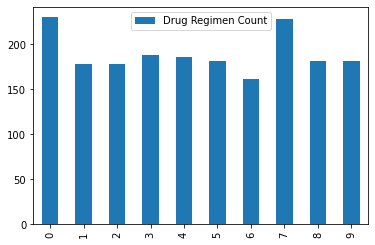

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
    
# Get the number of counts for each drug regime
    # https://re-thought.com/pandas-value_counts/ ***6.) value_counts() as dataframe***
# Get value counts of the drug regimes and save to an variable
drug_regime_value_counts = mouse_study_df["Drug Regimen"].value_counts()
# Make data frame from the set variable
drug_regime_value_counts_df = pd.DataFrame(drug_regime_value_counts)
# Re-set the index (now I have two columns)
drug_regime_value_counts_df = drug_regime_value_counts_df.reset_index()
# Rename the columns
drug_regime_value_counts_df.columns = ["Drug Regimen", "Drug Regimen Count"]
# Sort values by alphebetical order of the Drug Regimen column
drug_regime_value_counts_sorted_df = drug_regime_value_counts_df.sort_values(by="Drug Regimen")
# Reset the index
drug_regime_value_counts_sorted_df = drug_regime_value_counts_sorted_df.reset_index(drop = True)
# Display the data frame
drug_regime_value_counts_sorted_df

# Make bar chart
drug_regime_value_counts_sorted_df.plot.bar()

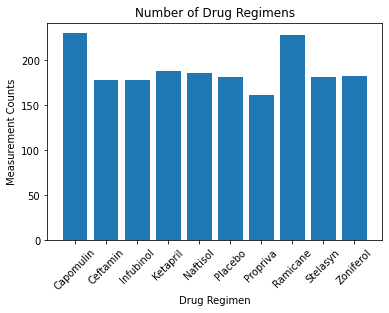

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Using the data frame: drug_regime_value_counts_sorted_df
# Save Drug Regimen as a list for the x-axis
names = drug_regime_value_counts_sorted_df["Drug Regimen"].to_list()
# Save Drug Regimen Count as y-axis
values = drug_regime_value_counts_sorted_df["Drug Regimen Count"].to_list()

# Make bar chart
regime_counts = plt.bar(names,values)
plt.xticks(rotation = 45)
plt.title("Number of Drug Regimens") 
plt.xlabel('Drug Regimen')
plt.ylabel('Measurement Counts')
plt.show ()

<AxesSubplot:ylabel='Count'>

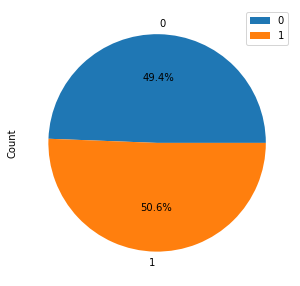

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Get value counts for the sex of the mice and save to an variable
mice_sex_value_counts = mouse_study_df["Sex"].value_counts()
# Make data frame from the set variable
mice_sex_value_counts_df = pd.DataFrame(mice_sex_value_counts)
# Re-set the index (now I have two columns)
mice_sex_value_counts_df = mice_sex_value_counts_df.reset_index()
# Rename the columns
mice_sex_value_counts_df.columns = ["Sex", "Count"]
# Sort values by alphebetical order of the Drug Regimen column
mice_sex_value_counts_df_sorted_df = mice_sex_value_counts_df.sort_values(by="Sex")
# Reset the index
mice_sex_value_counts_df_sorted_df = mice_sex_value_counts_df_sorted_df.reset_index(drop = True)
# Display the data frame
mice_sex_value_counts_df_sorted_df

mice_sex_value_counts_df_sorted_df.plot.pie(y='Count',figsize=(5, 5),autopct='%1.1f%%', startangle=0)


In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [19]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
